#Многорукие бандиты

Самое важное в RL - требуется оценивать действия, а не получать инструкции о том, какие действия правильны. Т.е. заключения о "хороших" и "плохих" действиях в системе делаются не на основе книги "Свод правил о жизни в среде: видишь красный - иди направо", а на личном опыте взаимодействия со средой.

Именно поэтому мы ищем те самые "хорошие" действия. Оценочная обратная связь показывает, насколько хорошим было
выбранное действие.

С помощью многоруких бандитов мы рассмотрим именно эту оценочную связь в упрощенной форме, т.е. посмотрим ровно одну итерацию взаимодействия агента со средой. Это означает, что на данном этапе мы не будем рассматривать влияние агента на среду и не будем смотреть на череду взаимосвязанных
действий, как при игре в покер. Мы скорее сыграем в игру "В какой руке". Наши действия не будут влять на то, в какой руке дальше среда спрячет монетку.

##Постановка задачи

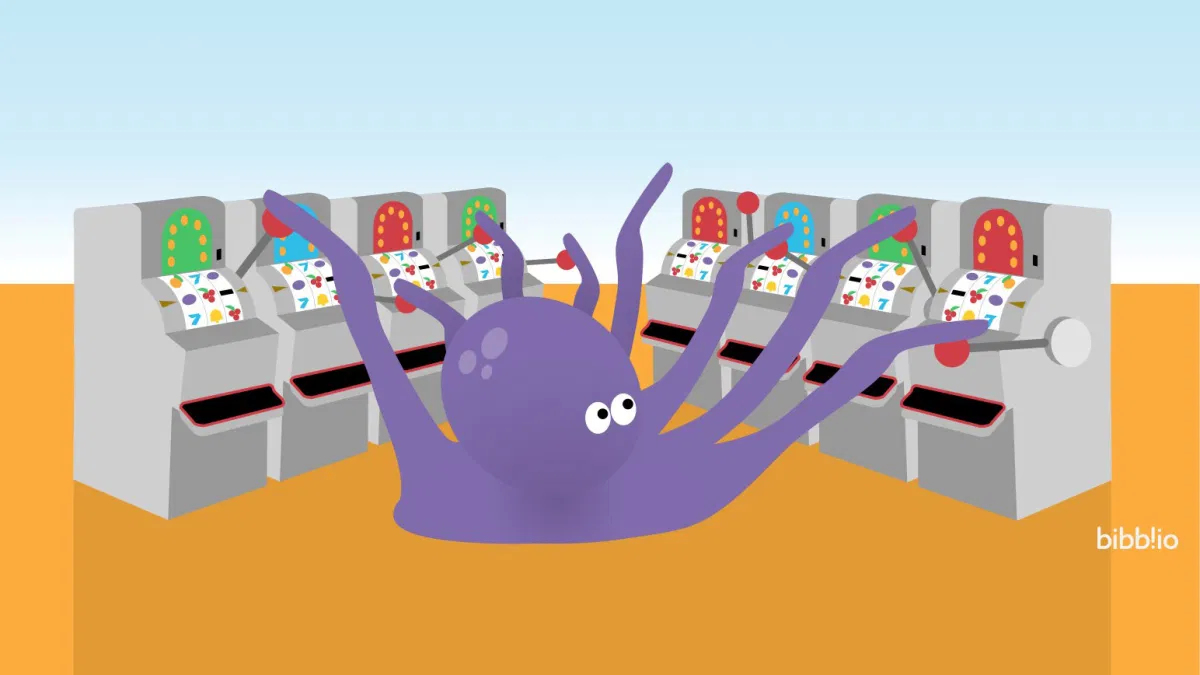

Есть автомат с k-рычагами. Вы многократно выбираете разные рычаги. После каждого выбора Вы получаете численное вознаграждение. Выбирается вознаграждение из стационарного распределения вероятностей, которое зависит от выбранного действия.

**<font color='orange'>Цель</font>** - максимизировать ожидаемое полное вознаграждение за период.

Говоря простым языком - нам нужно угадать, какой рычаг выбирать для получения наибольшей награды спустя сколько-то запусков.

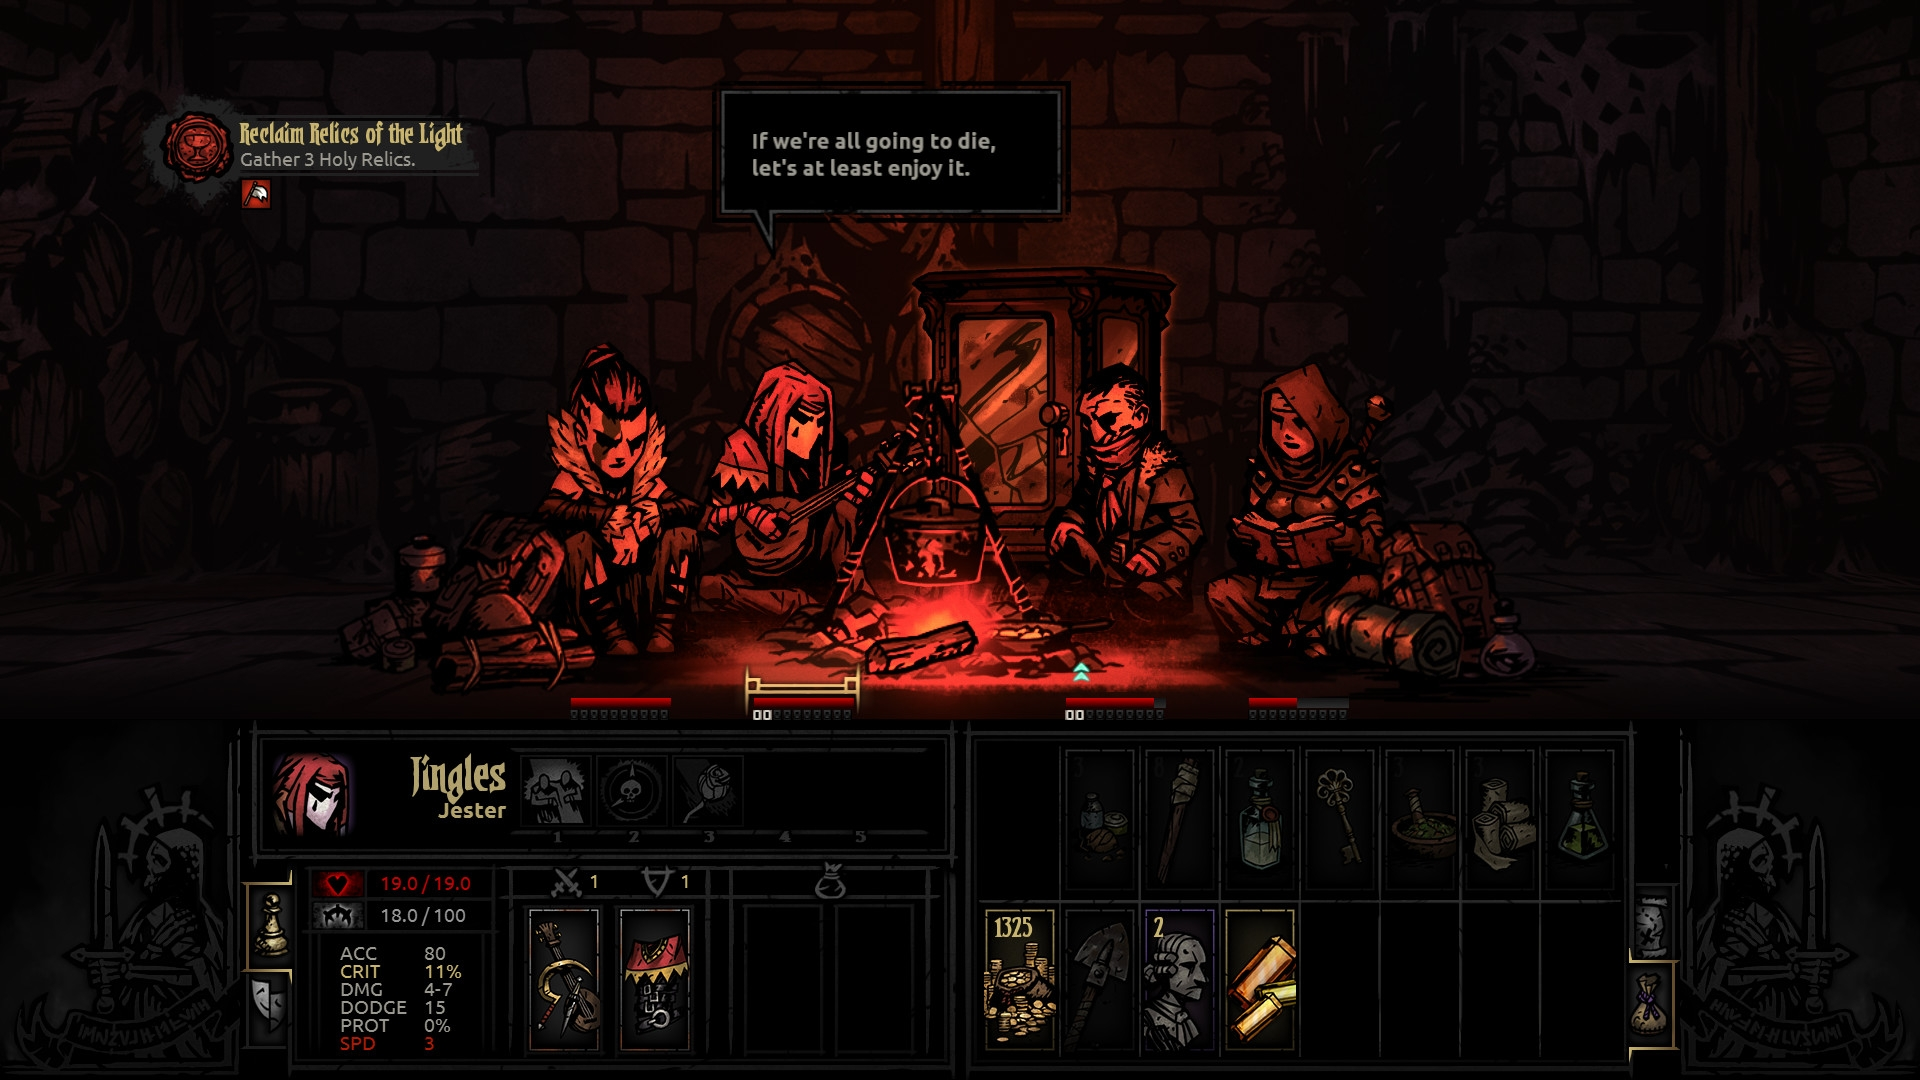








Благодаря повторному выбору действий мы стремимся **<font color='orange'>максимизировать свой выигрыш</font>**, концентрируя усилия только на лучших рычагах.

В нашей задаче о k-руком бандите с каждым из k действий связано ожидаемое, или среднее, вознаграждение при условии выбора этого действия; будем называть его ценностью действия.

Обозначим $A_t$ действие, выбранное на временном
шаге t, а $R_t$ – соответствующее ему вознаграждение. Тогда **<font color='orange'>истинная ценность произвольного действия a</font>**, обозначаемая $q^*(a)$, – это математическое ожидание вознаграждения при условии выбора $a$:

$$q^*(a) = 𝔼[R_t | A_t = a]$$

Если бы мы знали ценность каждого действия, то задача о k-руком бандите решалась бы тривиально: нужно было бы всегда выбирать действие с максимальной ценностью. Однако, это не так. Следовательно, мы хотим, чтобы наше предположение ценности действия $Q_t(a)$ было наиболее близко к $q^*(a)$.

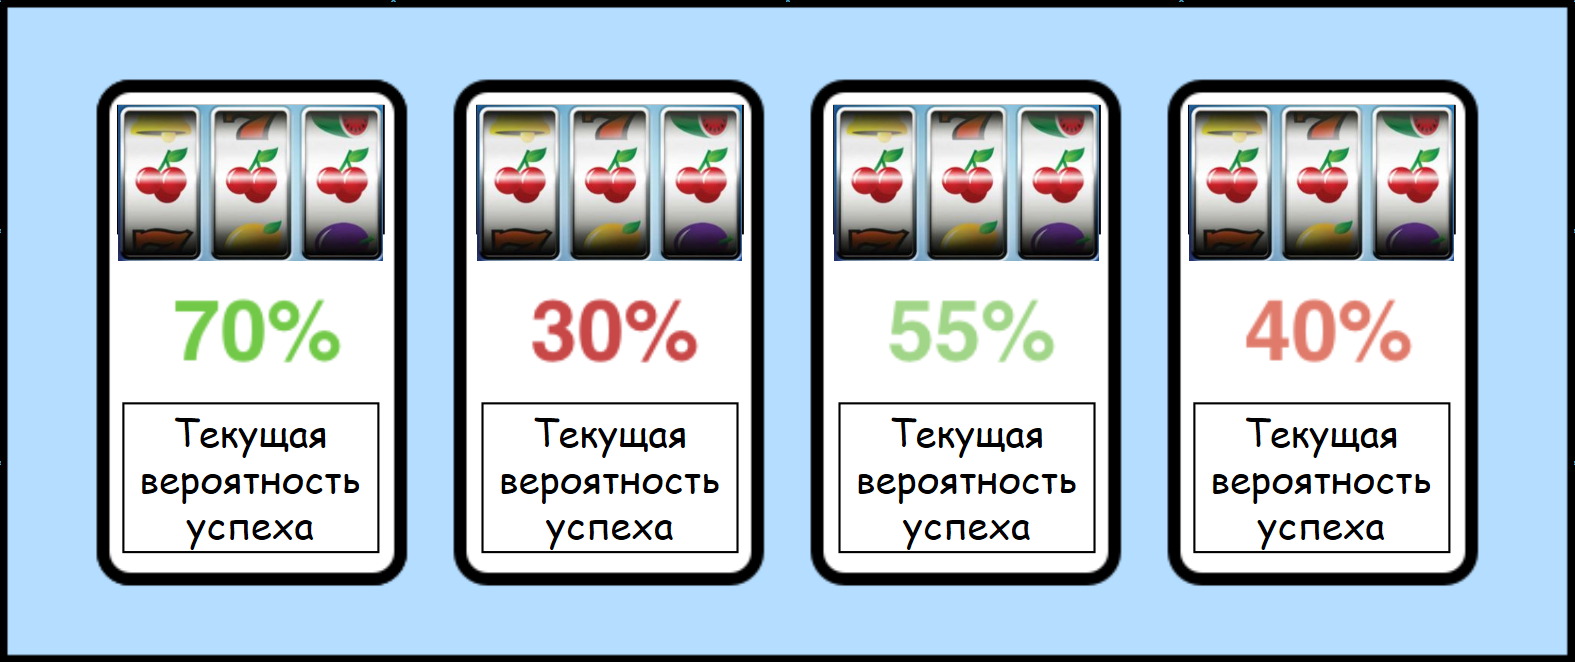

Если мы будем записывать наши действия, то увидим на любом временном шаге по крайней мере одно действие с максимальной оценкой. Назовем эти действия **<font color='orange'>жадными</font>**.

Если выбирается любое из таких действий, то мы **<font color='orange'>используем</font>** текущие знания о ценности действий. Если же выбирается какое-то нежадное действие, то мы занимаемся **<font color='orange'>исследованием</font>**, поскольку это позволяет улучшить оценку ценности этого действия.

Использование дает возможность максимизировать ожидаемое вознаграждение на одном шаге, а исследование может дать большее суммарное вознаграждение в длительной перспективе.

Поскольку при выборе одного действия нельзя одновременно исследовать и использовать, часто говорят о «конфликте» между исследованием и использованием. Именно его мы и увидим при решении данной задачи.

#### Пример №1. Изменения оценок при случайном выборе рычагов.

В начальном положении у нас оценки равны 0. В $t=0$ мы выбрали первое действие $a=1$ и получили награду $R=1$, и в этой же строчке получили новые оценки: 1 для первого рычага и 0 для второго рычага.

Просматривая дальше табличку мы видим как раз иллюстрацию конфликта между исследованием и использованием. Если в этой строчке с оценками 1 для первого рычага и 0 для второго рычага мы выберем использование, т.е. жадное действие - первый рычаг, то мы не сможем исследовать. А если выберем исследование со вторым рычагом, т.е. нежадное действие, то не сможем использовать наши знания о среде на текущий момент.

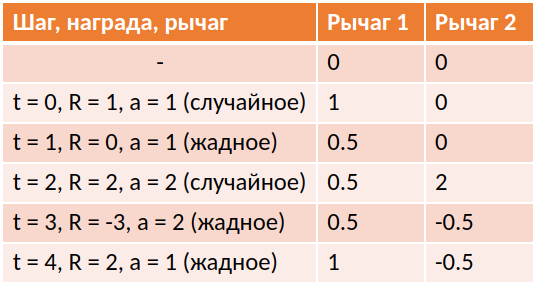

##Методы оценки ценности действий

Так как истинная ценность действия – это среднее вознаграждение при условии выбора этого действия, то эту величину можно естественно оценить, усреднив фактически полученные вознаграждения:

(1)$$Q_t(a) = \frac{\sum_{n=1}^{t-1}R_n*𝟙_{A_i=a}}{\sum_{n=1}^{t-1}  𝟙_{A_i=a}},$$

где $𝟙_{A_i=a}$ ($𝟙_{predicate}$ в общей форме) обозначает случайную величину, равную 1, если предикат predicate равен true, и 0 в противном случае. Если знаменатель равен 0, то в качестве $Q_t(a)$ принимается какое-нибудь значение по умолчанию, например 0. Когда знаменатель стремится к бесконечности, $Q_t(a)$, по закону больших чисел, сходится к $q^*(a)$.

То есть, мы смотрим на награду, полученную при выборе этого действия, усредняем по количеству раз, сколько мы его выбирали, и смотрим, на сколько оно ценно. Соответственно, чем больше итераций, в которых мы выбираем это действие, тем точнее наше представление о ценности этого действия. Для большого количества итераций с рычагом, у которого низкая вероятность выпадения 100 фишек, средняя награда будет гораздо ниже 100, так как это событие происходит редко.

Назовем это **<font color='orange'>методом выборочного среднего</font>** для оценки ценности значений, поскольку каждая оценка является средним по выборке релевантных действию вознаграждений.

Простейшее правило – выбирать действие с наибольшей оценкой ценности, т. е. одно из жадных действий в смысле предыдущего раздела. Если жадных действий несколько, то выбирается любое из них, например, случайным образом:

(2)$$A_t = argmax_a(Q_t(a)),$$

где $argmax_a$ обозначает действие, для которого следующее далее выражение принимает максимум.

При выборе жадного действия всегда используется текущее знание, чтобы максимизировать немедленное вознаграждение - мы не тратим время на проверки, не окажутся ли, менее доходные действия более выгодными.

Простая альтернатива – вести себя жадно большую часть времени, но иногда, с малой вероятностью $ε$, случайным образом выбирать какое-то из прочих действий с одинаковой вероятностью, не зависящей от оценок ценности действий. Эти методы называются **<font color='orange'>$ε$-жадными</font>**. Их преимущество состоит в том, что в пределе, когда число шагов стремится к бесконечности, каждое действие будет случайно выбрано бесконечное число раз, поэтому
все $Q_t(a)$ сходятся к $q^*(a)$.

#### Пример №2. Жадная политика.

В начальном положении мы задали оценки равными 0. В $t=0$ мы выбраем действие жадно, но так как оценки равны, то из них мы выбираем в итоге случайное. мы выбрали третий рычаг $a=3$ и получили награду $R=2$, и обновили оценки. Теперь мы будем выбирать третий рычаг пока его оценка не станет меньше 0, так как мы выбираем жадное действие - действие с максимальной оценкой.

Просматривая дальше табличку мы видим, что только на шаге $t=3$ жадная политика попробует другой рычаг. Если бы наша оценка третьего рычага не опустилась ниже 0, мы бы застряли в этом действии и не проверили другие рычаги никогда.

При $ε$-жадной политике у нас есть шанс вырваться из этого круга и иногда попробовать другие действия.

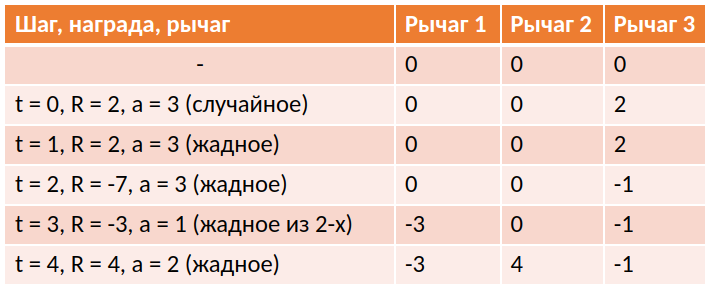

### Обсуждение


1.   Рассмотрим ε-жадный выбор действия для случая двух действий и $ε = 0.6$. Чему равна вероятность выбора жадного действия?


### Ответ

1.  $1-0.6 = 0.4$, соответственно у нас более исследовательская политика.

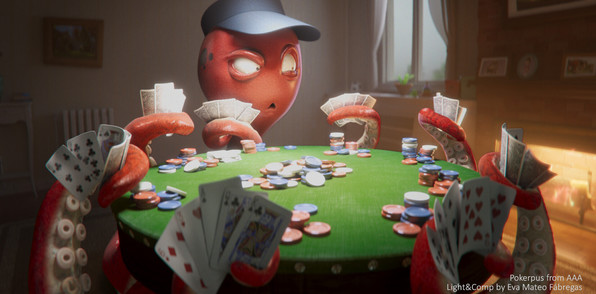

##10-рукий бандит

Чтобы грубо оценить относительную эффективность жадных и ε-жадных методов
ценности действий, сравним их численно на наборе тестовых задач.

В набор вошли 2000 случайно сгенерированных задач о $k$-руких бандитах при $k = 10$.
Для каждой задачи ценности действий $q^*(a), a = 1, …, 10$, выбирались из нормального распределения со средним 0 и дисперсией 1.

Затем, когда примененный к этой задаче метод обучения выбирал на шаге $t$ действие $A_t$, из нормального распределения со средним $q^*(A_t)$ и дисперсией 1 выбиралось вознаграждение $R_t$.

Ниже приведены эти нормальные распределения относительно наших 10 рычагов.

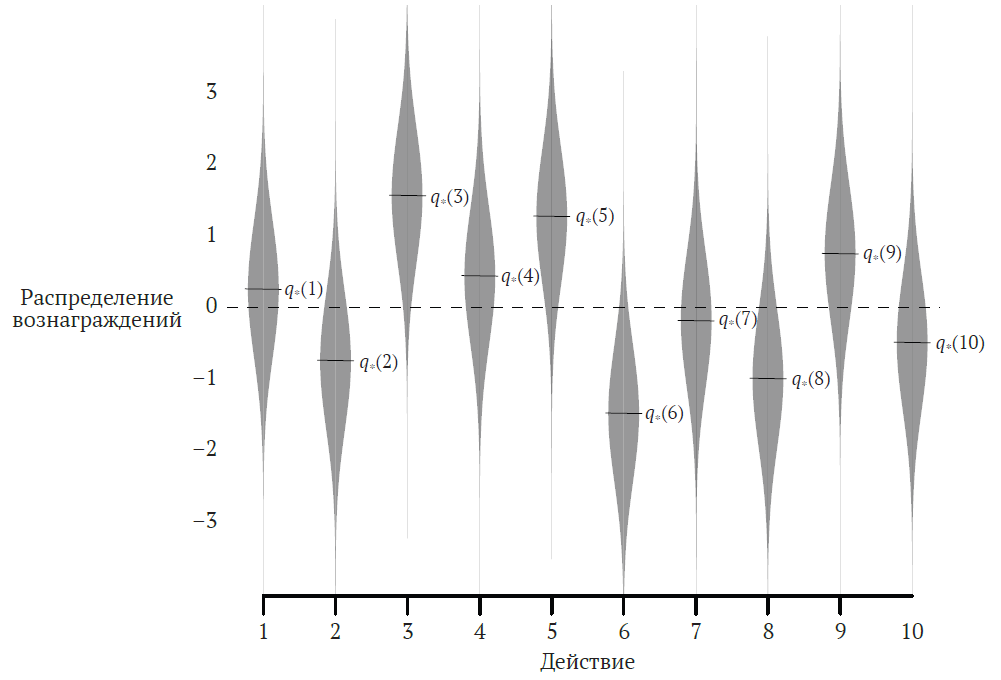

Такой набор тестовых задач мы будем называть **<font color='orange'>10-руким испытательным стендом</font>**. Для любого метода обучения мы можем измерить улучшение качества и поведения с обретением опыта на протяжении 1000 временных шагов в применении к одной из задач о бандите. Это будет один прогон теста. Выполнив 2000 независимых прогонов, каждый раз с новой задачей о бандите по 1000 временных шагов, мы получим представление о среднем поведении алгоритма обучения.

То есть, мы 2000 раз запустим обучение агентов. Каждое обучение будет длится 1000 выборов рычага из 10 возможных рычагов.

Ниже приведен график сравнения обучения жадного метода и двух $ε$-жадных (при $ε = 0.01$ и $ε = 0.1$). Во всех методах оценки ценности значений были получены усреднением по выборке.

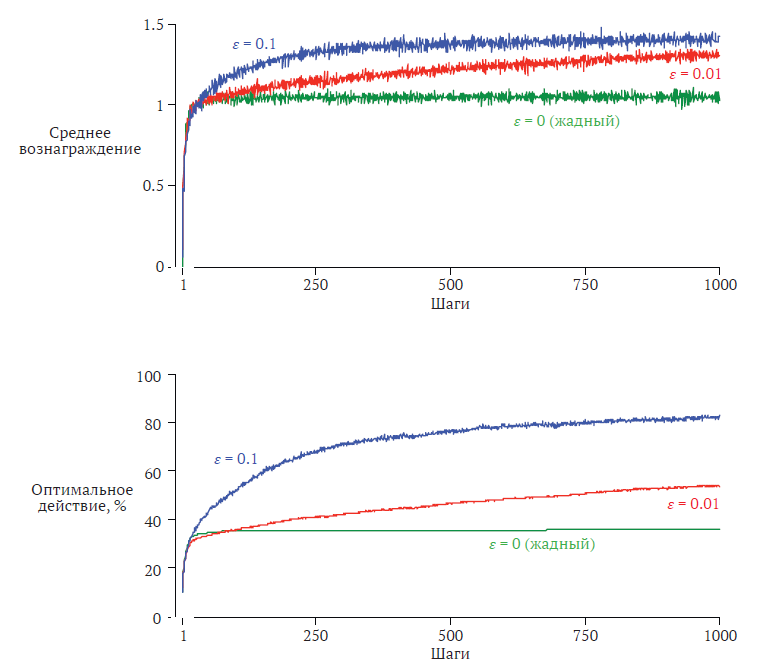

Видно, что и на верхнем, и на нижнем графике жадный алгоритм выходит на плато раньше и ниже нежадных. Т.о., в долгосрочной перспективе жадный метод работает значительно хуже, потому что часто застревает в неоптимальных действиях.

На нижнем графике видно, что жадный метод находил оптимальное действие примерно в одной трети задач. В остальных двух третях выбор начального действия был плохим, но метод никогда не пересматривал его.

У нежадных алгоритмов: при $ε = 0.1$ метод исследовал больше времени и обычно находил оптимальное действие раньше, но никогда не выбирал это действие более чем в 91% случаев; при $ε = 0.01$ улучшение происходило медленнее, но в итоге он показал хорошие результаты.

Можно также уменьшать $ε$ с течением времени, чтобы попытаться получить лучшее из обоих методов.

Будут ли ε-жадные методы лучше жадных, **<font color='orange'>зависит от задачи</font>**.

Предположим, что дисперсия вознаграждения больше, скажем, не 1, а 10. Тогда для нахождения оптимального действия понадобилось бы  **<font color='orange'>больше исследовать</font>**, и ε-жадные методы оказались бы еще лучше жадных.

С другой стороны, если дисперсия вознаграждения равна нулю, то жадный метод будет знать истинную ценность каждого действия, выбрав его всего один раз. В таком случае жадный метод мог бы работать лучше, потому что нашел бы **<font color='orange'>оптимальное действие</font>**, вообще не тратя времени на исследование. Разумеется, при оапределенных начальных значениях оценок.

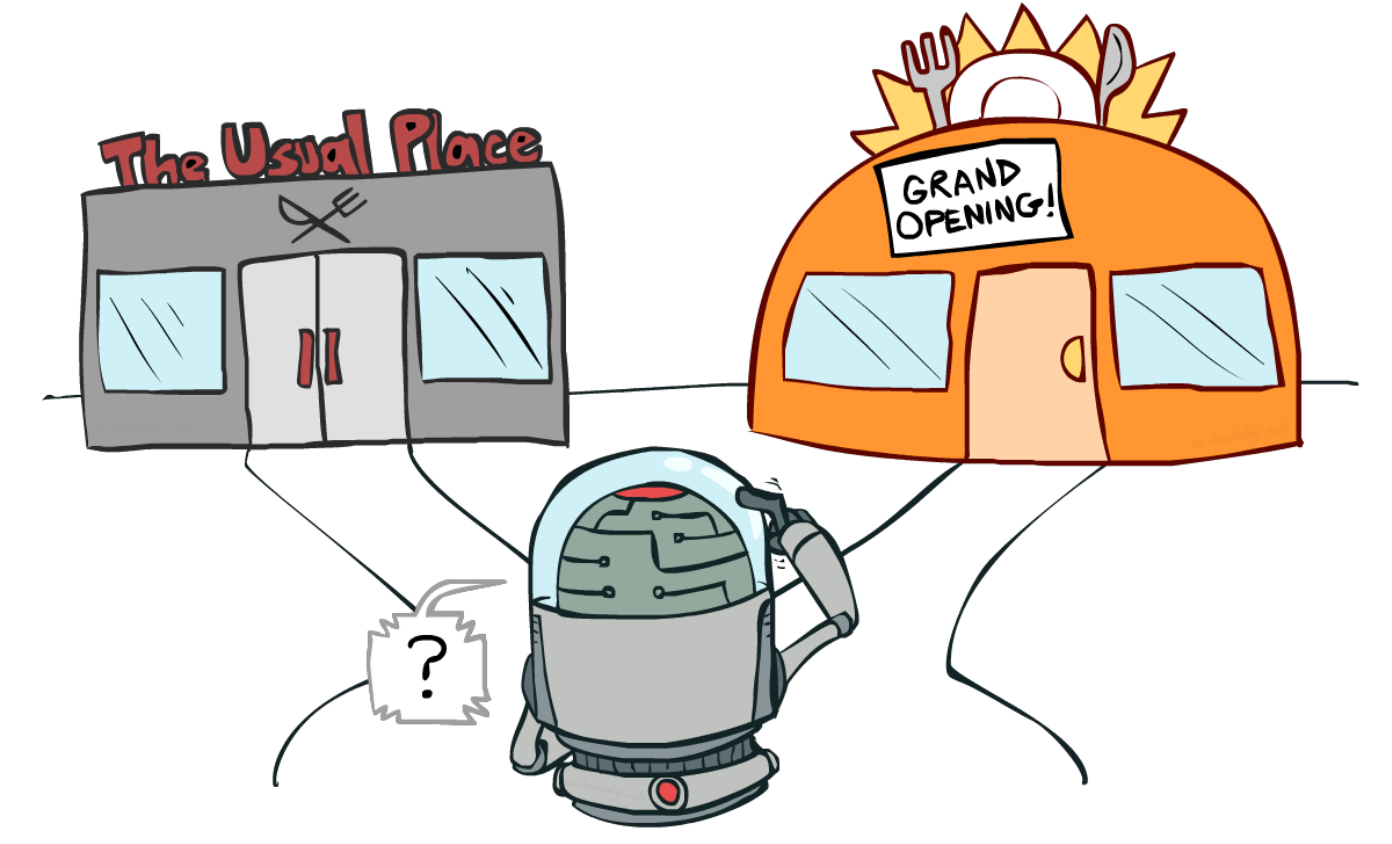

Но даже в детерминированном случае исследование дает заметные преимущества.

Например, предположим, что задача о бандите нестационарна, т. е. **<font color='orange'>истинные ценности действий изменяются со временем</font>**. Тогда исследование необходимо даже в детерминированном случае, чтобы быть уверенным, что никакое нежадное действие не стало лучше жадного.

Теперь немного контекста по терминологии в примерах: детерминированность и стационарность среды.

Представим, что есть некоторая среда - автомат с двумя рычагами.

На один из рычагов с вероятностью 100% всегда выпадает 1 фишка, на втором с вероятностью 100% всегда выпадает 5 фишек. Это детерминированная и стационарная среда.

Теперь представим, что по некоторым дням у них меняется количество выпадающих фишек: на первом с вероятностью 100% 2 дня в неделю выпадает 7 фишек, на втором 3 дня в неделю с вероятностью 100% выпадает 2 фишки. Это детерминированная, но нестационарная среда - вероятности определены, но среда меняется в соответствии с каким-то правилом.

Вернемся к первоначальному варианту и представим, что сменились вероятности: теперь одна фишка на первом рычаге будет выпадать в 70%, а 5 фишек у второго рычага в 20% случаев. Такая среда является недетерминированной, но хотя бы стационарной.

А теперь возьмем крайний случай: недетерминированный и нестационарный. В таком случае раздача фишек будет не только не со 100% вероятностью, но еще и зависеть от дня недели. Т.е. на 1 рычаге по понедельникам средам и пятницам будет выпадать 5 фишек в 70% случаев, а в остальные дни с вероятностью 15% будет выпадать 9 фишек.

### Обсуждение


1.   Рассмотрим задачу о k-руком бандите с k = 4 действиями, обозначенными 1, 2, 3, 4. Разберем применение к этой задаче алгоритма бандита с ε-жадным выбором действия, выборочным усреднением оценок ценности действий и начальными оценками $Q_1(a)= 0$ для всех a. Предположим, что начало последовательности действий и вознаграждений выглядит так: $A_1$ = 1, $R_1$ = -1, $A_2$ = 2, $R_2$ = –1, $A_3$ = 2, $R_3$ = –2, $A_4$ = 2, $R_4$ = 2, $A_5$ = 3, $R_5$ = 0. На некоторых из этих временных шагов мог иметь место ε-случай, т. е. действие выбиралось случайным образом. На каких шагах так оно заведомо и было? На каких шагах это могло случиться, а могло и не случиться?
2.   Глядя на графики выше, можете ли Вы сказать, какой метод будет работать лучше других в долгосрочной перспективе?



## Инкрементная реализация
>Ближе к коду

Чтобы упростить обозначения, сосредоточимся на одном действии. Обозначим
$R_i$ вознаграждение, полученное после $i$-го выбора этого действия, а $Q_n$ – оценку его ценности, после того как оно было выбрано $n – 1$ раз. Это можно записать так:

(3)$$Q_n = \frac{R_1+R_2+...+R_{n-1}}{n-1}$$
Напрашивающаяся реализация – хранить информацию обо всех вознаграждениях и выполнять это вычисление всякий раз, как понадобится значение оценки. Но тогда требования к памяти и объем вычислений будут расти со временем, по мере поступления новых вознаграждений.

Чтобы этого избежать, нужно данную формулу свести к **<font color='orange'>инкрементному</font>** (пошаговому) варианту. Так она выглядит:

(4)$$Q_{n+1} = \frac{1}{n}\sum_{i=1}^{n}R_i = \frac{1}{n}(R_n+\sum_{i=1}^{n-1}R_i)= \frac{1}{n}(R_n+(n-1)\frac{1}{n-1}\sum_{i=1}^{n-1}R_i) = $$
$$ = \frac{1}{n}(R_n+(n-1)Q_n) = \frac{1}{n}(R_n+nQ_n-Q_n) = Q_n+\frac{1}{n}[R_n-Q_n]$$

Формула справедлива и для $n = 1$.

Обобщая эту формулу, получаем **<font color='orange'>общее правило обновлений</font>**, чаще всего лежащее в основе RL методов:
$$НоваяОценка ⟵ СтараяОценка + РазмерШага[Цель - СтараяОценка]$$

Выражение [Цель – СтараяОценка] называется **<font color='orange'>ошибкой оценки</font>**. Она уменьшается благодаря шагу в направлении Цели. Предполагается, что цель указывает желательное направление движения, но она может быть искажена шумом. В данном случае целью является $n$-ое вознаграждение.

Параметр РазмерШага, используемый в инкрементной формуле, изменяется на каждом шаге. При обработке $n$-го вознаграждения за действие a используется размер шага $\frac{1}{n}$.

**<font color='orange'>Псевдокод полного алгоритма бандита с использованием инкрементно вычисляемых выборочных средних и ε-жадным выбором действий</font>**


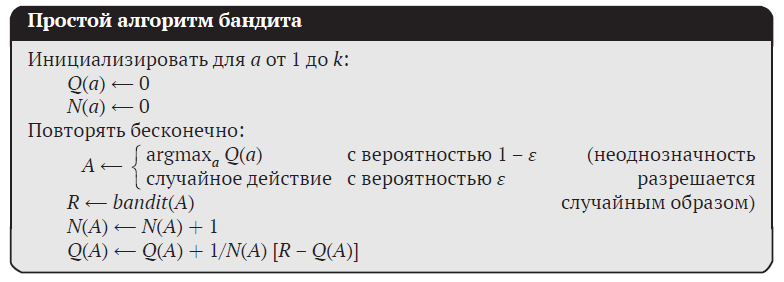


## Нестационарная задача

Методы, обсуждавшиеся выше, годятся для **<font color='orange'>стационарной задачи</font>** о бандите, т. е. для случая, когда вероятности вознаграждений не меняются со временем. Однако, на практике часто встречаются **<font color='orange'>нестационарные задачи</font>**.

В таких случаях имеет смысл придавать недавним вознаграждениям больший вес, чем полученным давно. Один из самых популярных способов такого рода – взять постоянный размер шага:

(5)$$Q_{n+1} = Q_n+\alpha[R_n-Q_n],$$
где размер шага - $\alpha$ задается из (0,1].

В результате $Q_{n+1}$ оказывается взвешенным средним прошлых вознаграждений и начальной оценки $Q_1$:

(6)$$Q_{n+1} = Q_n+\alpha[R_n-Q_n] = \alpha R_n+(1-\alpha)Q_n = \alpha R_n+(1-\alpha)[\alpha R_{n-1}+(1-\alpha)Q_{n-1}] = $$
$$= \alpha R_n+(1-\alpha)\alpha R_{n-1}+(1-\alpha)^2\alpha R_{n-2} +...+ (1-\alpha)^{n-1}\alpha R_1 + (1-\alpha)^nQ_1 = $$
$$ = (1-\alpha)^nQ_1 + \sum_{i=1}^{n}\alpha(1-\alpha)^{n-i}R_i$$

Мы называем эту величину **<font color='orange'>взвешенным средним</font>**. Вес убывает экспоненциально, как степень $1 – α$. (Если $1 – α = 0$, то весь вес отходит последнему вознаграждению $R_n$, поскольку, по соглашению, $0^0 = 1$.) Поэтому иногда встречается термин **<font color='orange'>экспоненциальное среднее, взвешенное по степени новизны</font>**.

В некоторых ситуациях бывает удобно изменять параметр размера на каждом шаге.


### Обсуждение


1.   Спланируйте и поставьте эксперимент, демонстрирующий трудности, с которыми сталкиваются методы выборочного среднего в нестационарных задачах. Для внесения нестационарности используйте модифицированную версию 10-рукого испытательного стенда, в которой все $q^*(a)$ вначале равны, а затем вычисляются путем независимых случайных блужданий (скажем, путем прибавления нормально распределенного приращения со средним 0 и стандартным отклонением $0.01$ ко всем $q^*(a)$ на каждом шаге), т.е. после расчета агентом $Q(A)$ в среде происходит приращение всех $q^*(a)$ на разное рандомное число. Постройте графики, как при оценке жадного и нежадных методов выше (10-рукий бандит), для метода ценности действий, в котором используются инкрементно вычисляемые выборочные средние, и еще одного метода, в котором размер шага постоянный, $α = 0.1$. Положите $ε = 0.1$, а количество шагов возьмите большим, например, $10 000$.

In [ ]:
from google.colab import output
output.eval_js('new Audio("https://static.wikia.nocookie.net/allstars_gamepedia/images/a/a6/AbathurHero_VoiceLineFour00.ogg").play()')

## Оптимистические начальные значения


Теперь рассмотрим один из вариантов коррекции изначальных методов в связи с конкретной задачей.

Все рассмотренные ранее методы в той или иной степени зависят от начальных оценок ценности действий, $Q_1(a)$. На языке статистики это означает, что **<font color='orange'>методы являются смещенными</font>** в силу начальных оценок. Для методов с выборочным средним смещение исчезает, после того как каждое действие было выбрано хотя бы один раз, но для методов с постоянным α смещение остается, хотя и убывает со временем. На практике такой вид смещения обычно не составляет проблемы, а иногда даже бывает очень полезным.

Недостаток заключается в том, что начальные оценки становятся, по существу, набором параметров, которые должен задавать пользователь, пусть даже все они полагаются равными нулю. А достоинство в том, что мы получаем простой способ включить априорную информацию об ожидаемом уровне вознаграждений.

Начальные ценности действий можно использовать также для поощрения исследования. Например, если задать начальные ценности не 0, а +5, то это будет весьма оптимистично. Но главное в том, что этот оптимизм поощряет методы ценности действий к исследованию. Какое бы действие ни выбрать вначале, вознаграждение окажется меньше начальной оценки; обучаемый склоняется к другим действиям, «разочаровавшись» в полученном вознаграждении. В результате каждое действие будет опробовано несколько раз, прежде чем оценки ценности сойдутся.

Т.о., система уделяет много времени исследованию, даже если каждый раз
выбирает жадное действие.

Ниже показано поведение 10-рукого испытательного стенда для жадного метода с $Q_1(a) = +5$ для всех a. Для сравнения показан также ε-жадный метод с $Q_1(a)
= 0$.

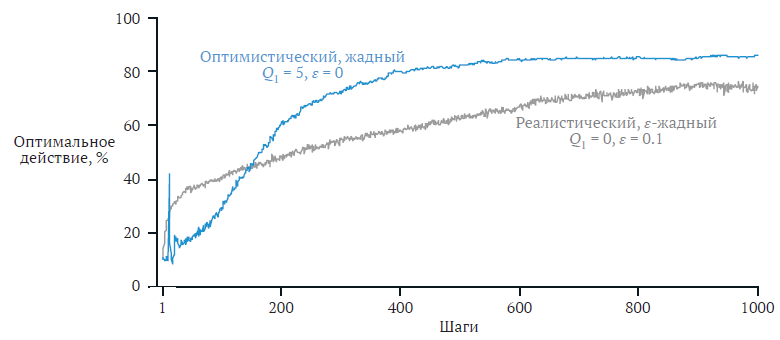

Вначале оптимистический метод работает хуже, потому что больше исследует, но в конечном итоге он выходит на первое место, поскольку со временем объем исследования уменьшается. Это называют **<font color='orange'>техникой поощрения исследования оптимистическими начальными значениями</font>**.

Этот прием может оказаться весьма эффективным в стационарных задачах, но очень далек от подхода к поощрению исследования, полезного в общем случае.

Колебания на ранней стадии, вероятно, вызваны тем, что алгоритм уменьшает завышенные начальные значения ценности для неоптимальных вариантов. Для начала агент будет думать, что все варианты хороши. Чтобы убедиться в обратном, он должен попробовать каждый из них несколько раз, прежде чем поймет, какие варианты действительно хорошие. В данном случае это будет зависеть от того, насколько быстро оценка плохих вариантов действий станет ниже, чем у хороших.

### Обсуждение


1.   Усовершенствуйте изначальный нестационарный вариант алгоритма 10-рукого бандита и добавьте оптимистическую жадную политику.